In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)

import graphcat.notebook
import imagecat.notebook

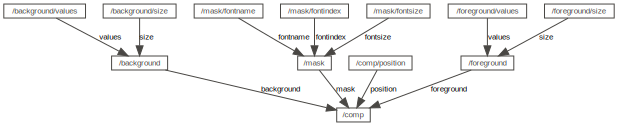

INFO:imagecat.operator:Task /foreground fill:
INFO:imagecat.operator:  components: ['r', 'g', 'b']
INFO:imagecat.operator:  layer: C
INFO:imagecat.operator:  role: Role.RGB
INFO:imagecat.operator:  size: [256 256]
INFO:imagecat.operator:  values: [0 0 0]
INFO:imagecat.operator:  output: Image(C: Layer(256x256x3 float16 ['r', 'g', 'b'] Role.RGB))
INFO:imagecat.operator:Task /background fill:
INFO:imagecat.operator:  components: ['r', 'g', 'b']
INFO:imagecat.operator:  layer: C
INFO:imagecat.operator:  role: Role.RGB
INFO:imagecat.operator:  size: [512 512]
INFO:imagecat.operator:  values: [1.  0.5 0. ]
INFO:imagecat.operator:  output: Image(C: Layer(512x512x3 float16 ['r', 'g', 'b'] Role.RGB))
INFO:imagecat.operator:Task /mask text:
INFO:imagecat.operator:  anchor: mm
INFO:imagecat.operator:  fontindex: 4
INFO:imagecat.operator:  fontname: HelveticaNeue
INFO:imagecat.operator:  fontsize: 0.33vh
INFO:imagecat.operator:  layer: A
INFO:imagecat.operator:  position: ('0.5vw', '0.5vh')
INFO:


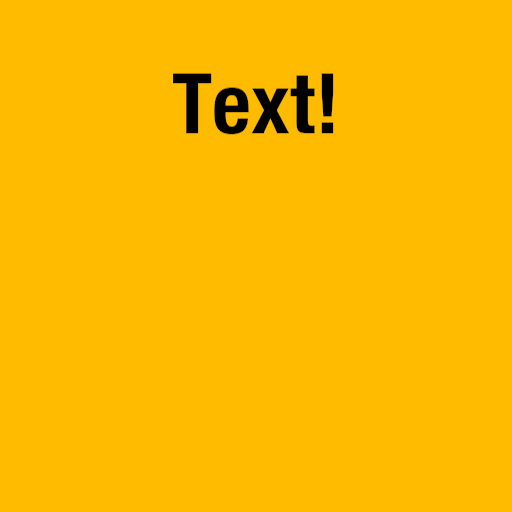

In [2]:
graph = graphcat.Graph()
imagecat.add_task(graph, "/foreground", imagecat.operator.fill, values=[0, 0, 0], size=[256, 256])
imagecat.add_task(graph, "/background", imagecat.operator.fill, values=[1, 0.5, 0], size=[512, 512])
imagecat.add_task(graph, "/mask", imagecat.operator.text, fontname="HelveticaNeue", fontindex=4, fontsize="0.33vh")
imagecat.add_task(graph, "/comp", imagecat.operator.composite, position=("0.5vw", "0.8vh"))
imagecat.set_links(graph, "/foreground", ("/comp", "foreground"))
imagecat.set_links(graph, "/background", ("/comp", "background"))
imagecat.set_links(graph, "/mask", ("/comp", "mask"))

graphcat.notebook.display(graph)
imagecat.notebook.display(graph.output("/comp"))